In [18]:
import tensorflow as tf
import numpy as np
array = tf.keras.utils.to_categorical([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], num_classes=10)
array1 = tf.keras.utils.to_categorical([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], num_classes=10)
array = np.resize(array, (20, 10))
array, array.shape

(array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],

In [19]:
import os
from pathlib import Path
data_dir = './data/train'
n_class = 10

def get_images_and_labels(data_dir):
    path = Path(Path.home() / "Documents" /
                "magistras" / "master_capsnet" / data_dir)
    images = np.array([])
    for image_dir in os.listdir(data_dir):
            images = np.append(images, [image_dir], axis=0)
    labels = tf.keras.utils.to_categorical(
        np.arange(n_class), num_classes=n_class)
    # resize adds using the same pattern
    labels = np.resize(labels, (len(images) * n_class, n_class))
    # repeat repeats each item by times
    images = np.repeat(images, n_class)
    images = list(map(lambda image: str(path / image), images))
    return (images, labels)


(images, labels) = get_images_and_labels(data_dir)
images[10], labels[10], len(images), len(labels)


('C:\\Users\\Tautvydas\\Documents\\magistras\\master_capsnet\\data\\train\\image-0001.png',
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 36480,
 36480)

In [20]:
import math
def label_process(label):
    if(label[0] == 1.0):
        return math.radians(-12.5)
    if(label[1] == 1.0):
        return math.radians(-10.0)
    if(label[2] == 1.0):
        return math.radians(-7.5)
    if(label[3] == 1.0):
        return math.radians(-5.0)
    if(label[4] == 1.0):
        return math.radians(-2.5)
    if(label[5] == 1.0):
        return math.radians(0.0)
    if(label[6] == 1.0):
        return math.radians(2.5)
    if(label[7] == 1.0):
        return math.radians(5.0)
    if(label[8] == 1.0):
        return math.radians(7.5)
    if(label[9] == 1.0):
        return math.radians(10.0)
    return math.radians(0.0)
label_process(labels[10])

-0.2181661564992912

In [21]:
import tensorflow_addons as tfa

RESIZE_WIDTH = 128 # 28  # 128  # 224
RESIZE_HEIGHT = 128 # 28  # 128  # 224
TARGET_SHAPE = (RESIZE_WIDTH, RESIZE_HEIGHT)
def preprocess_image_with_angle(filename, label):
    # print(filename, label)
    """
    Load the specified file as a JPEG image, preprocess it and
    resize it to the target shape.
    """

    image_string = tf.io.read_file(filename)
    image = tf.image.decode_png(image_string, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tfa.image.rotate(image, label_process(label))
    image = tf.image.central_crop(image, 0.8)
    image = tf.image.resize(image, TARGET_SHAPE)
    return image

preprocess_image_with_angle(images[10], labels[10])

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.34705883, 0.44901964, 0.4529412 ],
        [0.3627451 , 0.4647059 , 0.46078435],
        [0.35686275, 0.45882356, 0.46274513],
        ...,
        [0.35686275, 0.44705886, 0.42352945],
        [0.18235295, 0.22549021, 0.22156864],
        [0.        , 0.        , 0.        ]],

       [[0.3529412 , 0.4411765 , 0.4431373 ],
        [0.36078432, 0.454902  , 0.454902  ],
        [0.3529412 , 0.454902  , 0.45882356],
        ...,
        [0.37058824, 0.46274513, 0.4529412 ],
        [0.38823533, 0.47450984, 0.4666667 ],
        [0.3901961 , 0.47647062, 0.46862748]],

       [[0.3627451 , 0.45882356, 0.4529412 ],
        [0.35686275, 0.454902  , 0.4529412 ],
        [0.34509805, 0.44705886, 0.4431373 ],
        ...,
        [0.36666667, 0.4666667 , 0.454902  ],
        [0.39411768, 0.4803922 , 0.47254905],
        [0.3901961 , 0.48627454, 0.4803922 ]],

       ...,

       [[0.37058824, 0.454902  , 0.4529412 ],
        [0.37

In [22]:
batch_size = 50
def get_dataset():
    (images, labels) = get_images_and_labels(data_dir)
    images_count = len(images)
    def generator():
        for image, l in zip(images, labels):
            processed = preprocess_image_with_angle(image, l)
            # print("processed", processed)
            yield (processed, l), (l, processed)
    dataset = tf.data.Dataset.from_generator(generator, output_signature=(
        (tf.TensorSpec(shape=(RESIZE_WIDTH, RESIZE_HEIGHT, 3), dtype=tf.float32),
         tf.TensorSpec(shape=(10), dtype=tf.float32)),
        (tf.TensorSpec(shape=(10), dtype=tf.float32),
         tf.TensorSpec(shape=(RESIZE_WIDTH, RESIZE_HEIGHT, 3), dtype=tf.float32))))
    train_ds = dataset.take(round(images_count * 0.8)).batch(batch_size, drop_remainder=False)
    valid_ds = dataset.skip(round(images_count * 0.8)).batch(batch_size, drop_remainder=False)
    return train_ds, valid_ds, images_count

train_ds, valid_ds, images_count = get_dataset()
# (images, labels), (labels1, images1) = list(train_ds.take(1).as_numpy_iterator())[0]
# np.shape(images), np.shape(labels), images_count


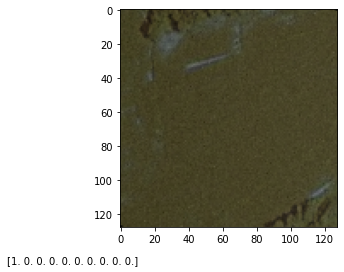

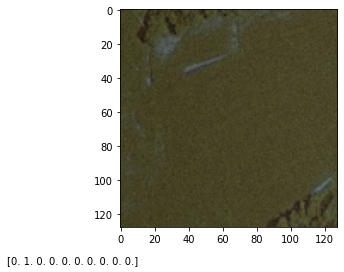

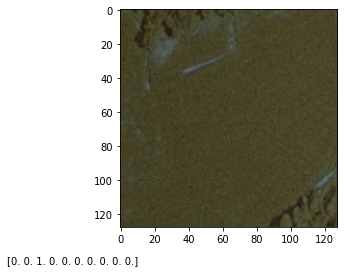

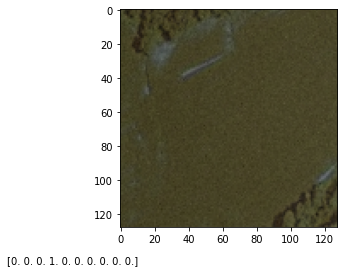

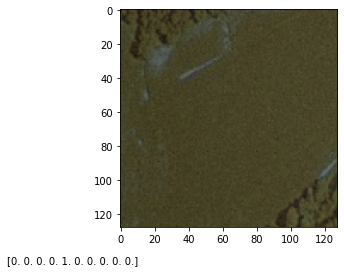

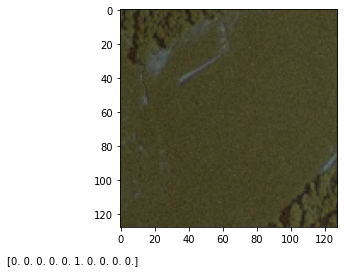

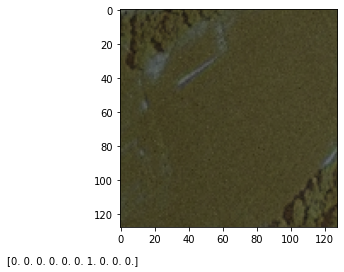

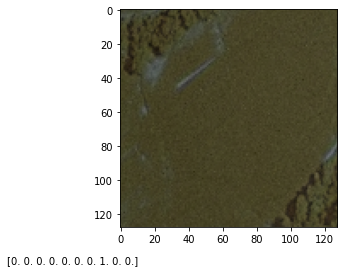

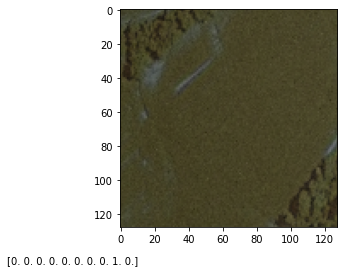

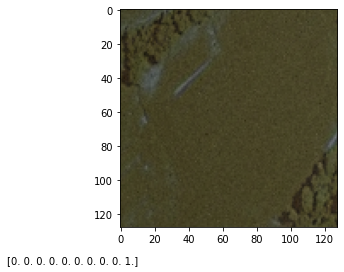

In [23]:
from data import show_images
import matplotlib.pyplot as plt

def visualize_image(image, label):
    """Visualize a image from the supplied batches."""
    # print(type(image), image.shape)
    # image2 = np.squeeze(image, axis=0)
    # print(image2)
    plt.imshow(image)
    plt.figtext(0, 0, label)
    plt.show()

for (images, labels), (labels1, images1) in list(train_ds.take(1).as_numpy_iterator()):
    for i in range(0, 10):
    # print(len(images))
        visualize_image(images[i], str(labels[i]))
    # display_images.append(images[0])
# print(type(display_images[0]), display_images[0].shape)
# show_images(images)
# visualize_image(display_images[0], 'a')

In [24]:
from capsnet_angles import CapsNet 
model, eval_model, manipulate_model = CapsNet(input_shape=np.shape(images[0]),
                                                  n_class=n_class,
                                                  routings=3,
                                                  batch_size=batch_size)
model.summary()

starting CapsNet (128, 128, 3) 10 3 50
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(50, 128, 128, 3)]  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (50, 120, 120, 256)  62464       input_1[0][0]                    
__________________________________________________________________________________________________
conv1_1 (Conv2D)                (50, 56, 56, 256)    5308672     conv1[0][0]                      
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (50, 28, 28, 256)    0           conv1_1[0][0]                    
_______________________________________________________

In [25]:
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers
K.set_image_data_format('channels_last')
lr = 0.001
lam_recon = 0.392

def margin_loss(y_true, y_pred):
    # print("margin_loss", y_true, y_pred)
    # tf.print(y_true)
    # tf.print(y_pred)
    """
    Margin loss for Eq.(4). When y_true[i, :] contains not just one `1`, this loss should work too. Not test it.
    :param y_true: [None, n_classes]
    :param y_pred: [None, num_capsule]
    :return: a scalar loss value.
    """
    # return tf.reduce_mean(tf.square(y_pred))
    L = y_true * tf.square(tf.maximum(0., 0.9 - y_pred)) + \
        0.5 * (1 - y_true) * tf.square(tf.maximum(0., y_pred - 0.1))
    # print("L", L)
    mean = tf.reduce_mean(tf.reduce_sum(L, 1))
    # print("mean", mean)
    # tf.print(y_true)
    # tf.print(y_pred)
    # tf.print(L)
    # tf.print(mean)
    return mean

model.compile(optimizer=optimizers.Adam(lr=lr),
                  loss=[margin_loss, 'mse'],
                  loss_weights=[1., lam_recon],
                  metrics={'capsnet': 'accuracy'})
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)
model.layers

c:\Users\Tautvydas\Documents\magistras\master_capsnet\venv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [26]:
model.fit(  # train_data,
    train_ds,
    steps_per_epoch=int(10),
    epochs=50,
    # validation_data=valid_ds,
    batch_size=batch_size)


Epoch 1/50
10/10 [==============================] - 26s 1s/step - loss: 0.8208 - capsnet_loss: 0.8094 - decoder_loss: 0.0291 - capsnet_accuracy: 0.1100
Epoch 2/50
10/10 [==============================] - 12s 1s/step - loss: 0.8230 - capsnet_loss: 0.8094 - decoder_loss: 0.0346 - capsnet_accuracy: 0.1040
Epoch 3/50
10/10 [==============================] - 13s 1s/step - loss: 0.8231 - capsnet_loss: 0.8094 - decoder_loss: 0.0350 - capsnet_accuracy: 0.1020
Epoch 4/50
10/10 [==============================] - 12s 1s/step - loss: 0.8196 - capsnet_loss: 0.8094 - decoder_loss: 0.0260 - capsnet_accuracy: 0.1040
Epoch 5/50
10/10 [==============================] - 12s 1s/step - loss: 0.8198 - capsnet_loss: 0.8094 - decoder_loss: 0.0265 - capsnet_accuracy: 0.1000
Epoch 6/50
10/10 [==============================] - 12s 1s/step - loss: 0.8208 - capsnet_loss: 0.8094 - decoder_loss: 0.0291 - capsnet_accuracy: 0.1000
Epoch 7/50
10/10 [==============================] - 13s 1s/step - loss: 2.0532 - capsnet